### Импортирование библотек

In [2]:
%matplotlib inline
import os, glob
import tqdm
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/home/podonok/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Создание переменных папок

In [4]:
# Data path
data_path = './css-data'
# Train, Valid and Test path
train_path = os.path.join(data_path, 'train')
valid_path = os.path.join(data_path, 'valid')
test_path = os.path.join(data_path, 'test')
# We can access both images and labels
folders = ['images', 'labels']
print("Data Path: {}\nTrain Path: {}\nValid Path: {}\nTest Path: {}\n".format(data_path, train_path, valid_path, test_path))

Data Path: ./css-data
Train Path: ./css-data/train
Valid Path: ./css-data/valid
Test Path: ./css-data/test



### Собираем метаданные

In [5]:
train_dict = dict(train=0, valid=1, test=2)
path_dict = [train_path, valid_path, test_path]
class_names = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']
class_dict = dict(zip(range(len(class_names)), class_names))
print(class_dict)

{0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}


In [6]:
train_filenames = sorted(os.listdir(os.path.join(train_path, folders[0])))
valid_filenames = sorted(os.listdir(os.path.join(valid_path, folders[0])))
test_filenames = sorted(os.listdir(os.path.join(test_path, folders[0])))
train_labels = sorted(os.listdir(os.path.join(train_path, folders[1])))
valid_labels = sorted(os.listdir(os.path.join(valid_path, folders[1])))
test_labels = sorted(os.listdir(os.path.join(test_path, folders[1])))
print(train_filenames, valid_filenames, test_filenames)

['-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg', '-1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38f929.jpg', '-1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e6000af.jpg', '-1670-_png_jpg.rf.b42b26d784545ce1a033679674a4f3e5.jpg', '-1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4ebca6.jpg', '-1680-_png_jpg.rf.175b8e375a256e36cbe84985db1d8768.jpg', '-1680-_png_jpg.rf.19e88a5022427045071da3f267825d67.jpg', '-1680-_png_jpg.rf.56da4925f9967baa3e9deae422aac04f.jpg', '-1680-_png_jpg.rf.aac88b5b6fa0becf6442572810f8cf76.jpg', '-1680-_png_jpg.rf.fc3fb462afe2de723f6bc348720198f5.jpg', '-1975-_png_jpg.rf.b5622016579bca7e2e993de3470405e0.jpg', '-1975-_png_jpg.rf.c2be4021c4d6452f7941be256160f957.jpg', '-1975-_png_jpg.rf.cd700127b5005f75f2eaff2705c1cbb6.jpg', '-1975-_png_jpg.rf.d6c068e0d3eebc3b8e002413529c5e84.jpg', '-1975-_png_jpg.rf.f0c6b10f9762a19849b0fb7f1654c001.jpg', '-2252-_png_jpg.rf.5d2ba68a39912deb9e4383661418224f.jpg', '-2252-_png_jpg.rf.959ef543a1a8383d7ea395bec26b1030.jpg', '-2252-_png_j

In [7]:
t_f, v_f, te_f = [sorted(os.listdir(os.path.join(path_dict[i], folders[0]))) for i in range(len(path_dict))]
t_l, v_l, te_l = [sorted(os.listdir(os.path.join(path_dict[i], folders[1]))) for i in range(len(path_dict))]
print(t_f)

['-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg', '-1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38f929.jpg', '-1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e6000af.jpg', '-1670-_png_jpg.rf.b42b26d784545ce1a033679674a4f3e5.jpg', '-1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4ebca6.jpg', '-1680-_png_jpg.rf.175b8e375a256e36cbe84985db1d8768.jpg', '-1680-_png_jpg.rf.19e88a5022427045071da3f267825d67.jpg', '-1680-_png_jpg.rf.56da4925f9967baa3e9deae422aac04f.jpg', '-1680-_png_jpg.rf.aac88b5b6fa0becf6442572810f8cf76.jpg', '-1680-_png_jpg.rf.fc3fb462afe2de723f6bc348720198f5.jpg', '-1975-_png_jpg.rf.b5622016579bca7e2e993de3470405e0.jpg', '-1975-_png_jpg.rf.c2be4021c4d6452f7941be256160f957.jpg', '-1975-_png_jpg.rf.cd700127b5005f75f2eaff2705c1cbb6.jpg', '-1975-_png_jpg.rf.d6c068e0d3eebc3b8e002413529c5e84.jpg', '-1975-_png_jpg.rf.f0c6b10f9762a19849b0fb7f1654c001.jpg', '-2252-_png_jpg.rf.5d2ba68a39912deb9e4383661418224f.jpg', '-2252-_png_jpg.rf.959ef543a1a8383d7ea395bec26b1030.jpg', '-2252-_png_j

In [8]:
train_filenames==t_f, valid_filenames==v_f, test_filenames==te_f

(True, True, True)

In [9]:
train_labels==t_l, valid_labels==v_l, test_labels==te_l

(True, True, True)

### Проверяем совпадение наших данных

In [10]:
print("Total Train Files: {}\nTotal Valid Files: {}\nTotal Test Files:{}".format(len(train_filenames), len(valid_filenames), len(test_filenames)))

Total Train Files: 2605
Total Valid Files: 114
Total Test Files:82


In [11]:
# Проверяем кол-во файлов и аннотаций
len(train_filenames)==len(train_labels), len(valid_filenames)==len(valid_labels), len(test_filenames)==len(test_labels)

(True, True, True)

In [12]:
# Проверяем очередность файлов и аннотаций
[item.split('.')[0] for item in train_filenames]==[item.split('.')[0] for item in train_labels],\
[item.split('.')[0] for item in valid_filenames]==[item.split('.')[0] for item in valid_labels],\
[item.split('.')[0] for item in test_filenames]==[item.split('.')[0] for item in test_labels]

(True, True, True)

### Создаем таблицу с метаданными

In [13]:
df = pd.DataFrame()
df['filenames'] = train_filenames + valid_filenames + test_filenames
df['labelnames'] = train_labels + valid_labels + test_labels
df['train_id'] = [0]*len(train_filenames) + [1]*len(valid_filenames) + [2]*len(test_filenames)

In [14]:
df.head()

filenames  \
0  -1670-_png_jpg.rf.0463edb430019e01ec79eed27a63...   
1  -1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38...   
2  -1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e60...   
3  -1670-_png_jpg.rf.b42b26d784545ce1a033679674a4...   
4  -1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4e...   

                                          labelnames  train_id  
0  -1670-_png_jpg.rf.0463edb430019e01ec79eed27a63...         0  
1  -1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38...         0  
2  -1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e60...         0  
3  -1670-_png_jpg.rf.b42b26d784545ce1a033679674a4...         0  
4  -1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4e...         0

### Проверяем наличие дубликатов

In [16]:
df.filenames.duplicated().value_counts()

filenames
False    2801
Name: count, dtype: int64

In [18]:
# Кол-во файлов для train, val, и test выборки
df.train_id.value_counts()

train_id
0    2605
1     114
2      82
Name: count, dtype: int64

<Axes: title={'center': 'Train-Val-Test Split'}, xlabel='train_id'>

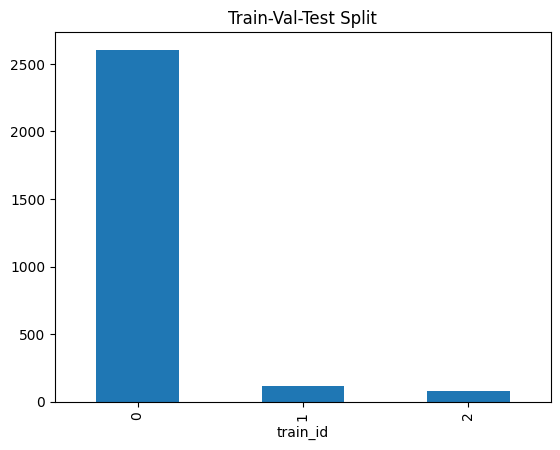

In [19]:
df.train_id.value_counts().plot(kind = 'bar', title = 'Train-Val-Test Split')

### Анализ распределения классов в каждой выборке

In [31]:
# Split list
train_keys = list(train_dict.keys())

In [32]:
# Complete path for annotation_files
annotation_files = (data_path + '/' + df.train_id.map(lambda x: train_keys[x]) + '/' + folders[1]
                    + '/' + df.labelnames).tolist()
t_id = df.train_id.tolist()
counts = []
invalid_idx = []
is_annotated = []
for idx, annotation_file in tqdm.tqdm(enumerate(annotation_files)):
    annotation = np.loadtxt(annotation_file)
    if len(annotation)==0:
        invalid_idx.append(idx)
        is_annotated.append(-1)
        counts.append([])
        continue
    if len(annotation.shape)==1:
        annotation = annotation.reshape(1, -1)
    counts.append(annotation[:,0].astype(int))
    is_annotated.append(1)
df['is_annotated'] = is_annotated

2801it [00:00, 7268.73it/s]


In [33]:
df.is_annotated.value_counts()

is_annotated
 1    2777
-1      24
Name: count, dtype: int64

#### Для каждого файла смотрим какие классы он в себя вмещает

In [34]:
df.head(100)

filenames  \
0   -1670-_png_jpg.rf.0463edb430019e01ec79eed27a63...   
1   -1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38...   
2   -1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e60...   
3   -1670-_png_jpg.rf.b42b26d784545ce1a033679674a4...   
4   -1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4e...   
..                                                ...   
95  005180_jpg.rf.07de45ecea6050e4afec7f8a3632ea11...   
96  005180_jpg.rf.07f95f7d40be1642632bca5a25661ec5...   
97  005180_jpg.rf.3c83b15d5bed446651582525866783fa...   
98  005180_jpg.rf.765ddd4046b2ce2755fde8140f5009f1...   
99  005180_jpg.rf.77e5bbc190a7bde710749bae284e6fff...   

                                           labelnames  train_id  is_annotated  \
0   -1670-_png_jpg.rf.0463edb430019e01ec79eed27a63...         0             1   
1   -1670-_png_jpg.rf.3cb172ea2c4165c19ae2dd498b38...         0             1   
2   -1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e60...         0             1   
3   -1670-_png_jpg.rf.b42b26d784545ce1a033679674a4...         0             1   
4   -1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4e...         0             1   
..                                                ...       ...           ...   
95  005180_jpg.rf.07de45ecea6050e4afec7f8a3632ea11...         0             1   
96  005180_jpg.rf.07f95f7d40be1642632bca5a25661ec5...         0             1   
97  005180_jpg.rf.3c83b15d5bed446651582525866783fa...         0             1   
98  005180_jpg.rf.765ddd4046b2ce2755fde8140f5009f1...         0             1   
99  005180_jpg.rf.77e5bbc190a7bde710749bae284e6fff...         0             1   

                                          count_dict  
0                     {0: 2, 1: 2, 2: 2, 3: 2, 5: 4}  
1                     {0: 2, 3: 2, 4: 4, 5: 9, 7: 2}  
2                     {0: 1, 2: 1, 4: 2, 5: 2, 8: 2}  
3                     {0: 3, 3: 3, 4: 3, 5: 7, 8: 6}  
4         {0: 2, 2: 1, 3: 3, 4: 2, 5: 6, 7: 1, 8: 5}  
..                                               ...  
95              {0: 3, 3: 3, 4: 1, 5: 4, 7: 2, 8: 1}  
96              {0: 4, 3: 4, 4: 3, 5: 5, 7: 1, 8: 1}  
97  {0: 1, 1: 1, 2: 2, 3: 3, 4: 2, 5: 4, 7: 1, 8: 3}  
98              {0: 2, 3: 2, 4: 1, 5: 2, 7: 1, 8: 3}  
99        {0: 2, 1: 2, 2: 1, 3: 3, 4: 3, 5: 5, 7: 2}  

[100 rows x 5 columns]

In [35]:
count_list = [np.unique(item, return_counts = True) for item in counts]
count_keys = [item[0] for item in count_list]
count_values = [item[1] for item in count_list]
count_dict = []
for ck,cv in zip(count_keys, count_values):
    count_dict.append(dict([(key,value) for key, value in zip(ck,cv)]))
df['count_dict'] = count_dict

In [36]:
from collections import Counter
train_count = df[df.train_id==0].count_dict.apply(lambda x: Counter(x)).sum()
valid_count = df[df.train_id==1].count_dict.apply(lambda x: Counter(x)).sum()
test_count = df[df.train_id==2].count_dict.apply(lambda x: Counter(x)).sum()

In [37]:
# We will normalize the counts to get a correct visualization, since there is huge difference
# between the counts of train valid and test splits
train_count = {key:value/sum(train_count.values()) for key, value in train_count.items()}
valid_count = {key:value/sum(valid_count.values()) for key, value in valid_count.items()}
test_count = {key:value/sum(test_count.values()) for key, value in test_count.items()}

In [38]:
print("Train Class Distribution Dict: {}\n\nValid Class Distribution Dict: {}\n\nTest Class Distribution Dict: {}"
     .format(train_count, valid_count, test_count))

Train Class Distribution Dict: {0: 0.08524190269684238, 1: 0.04474861092288928, 2: 0.06279983737633826, 3: 0.08394091340290012, 5: 0.2583547906220355, 4: 0.10738582463748475, 7: 0.0822062610109771, 8: 0.14221439219406423, 6: 0.09123187423770159, 9: 0.04187559289876677}

Valid Class Distribution Dict: {0: 0.1133428981348637, 3: 0.10616929698708752, 4: 0.15208034433285508, 5: 0.2381635581061693, 7: 0.058823529411764705, 2: 0.09899569583931134, 1: 0.03012912482065997, 6: 0.06312769010043041, 8: 0.07890961262553801, 9: 0.06025824964131994}

Test Class Distribution Dict: {0: 0.14473684210526316, 3: 0.10394736842105264, 4: 0.11842105263157894, 5: 0.22894736842105262, 6: 0.12105263157894737, 9: 0.05394736842105263, 2: 0.05394736842105263, 7: 0.08026315789473684, 8: 0.05789473684210526, 1: 0.03684210526315789}


In [28]:
df_count = pd.DataFrame()
df_count = pd.DataFrame({'train':train_count, 'valid': valid_count, 'test': test_count}).sort_index()

In [29]:
df_count['idx'] = pd.Series(df_count.index)

#### Классы распределены равномерно что хорошо скажется на качестве модели

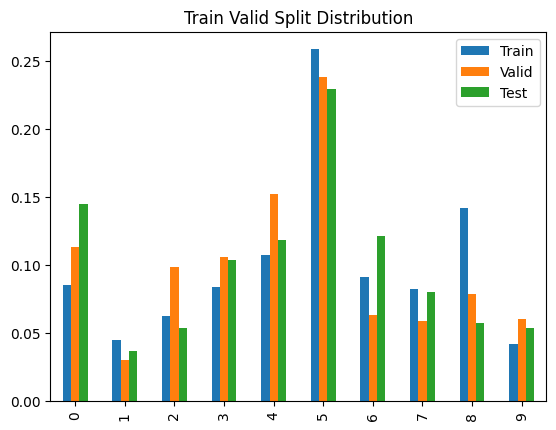

In [30]:
df_count.plot(y = ['train', 'valid', 'test'], kind = 'bar', title = 'Train Valid Split Distribution')
plt.legend(['Train', 'Valid', 'Test'])

### Визуализация данных

In [39]:
def yolo_annotation_to_bbox(annotation, img_height, img_width):
    """
    Converts Yolo annotations to bounding box coordinates
    Input:
    annotation: str, annotation file in .txt format
    img_height: int, image height
    img_width: int, image width
    Output:
    class: list, List of labels in the image
    bbox_list: list, List of bounding boxes in an image
    """
    sh = annotation.shape
    if len(sh)==0:
        print("No bounding box found")
    if len(sh)==1:
        annotation = annotation.reshape(1, -1)
    num_bbox = len(annotation)
    bbox_list = []
    for idx in range(num_bbox):
        c_x, c_y, w, h = annotation[idx][1:]
        x1 = ((c_x - w/2)*img_width).astype(int)
        x2 = ((c_x + w/2)*img_width).astype(int)
        y1 = ((c_y - h/2)*img_height).astype(int)
        y2 = ((c_y + h/2)*img_height).astype(int)
        bbox_list.append([x1, y1, x2, y2])
    return bbox_list

In [40]:
### invalid_files = (data_path + '/' + df.train_id[invalid_idx].apply(lambda x: train_keys[x]) + '/' + folders[0] + '/' + df.filenames[invalid_idx])
invalid_files = df.filenames[invalid_idx]
def visualize_samples(mode = 'train', n_samples = 12):
    """
    Plots 'n_samples' plots from train/valid/test split
    Input:
    mode: 'str' can take values from 'train'/'valid','test'
    n_samples: 'int'
    """
    # We will visualize only those files which have annotations 
    indices = df[(~df.filenames.isin(invalid_files))&(df.train_id==1)].sample(n_samples).index
    filenames = (data_path + '/' + df.train_id[indices].apply(lambda x: train_keys[x]) + '/' + folders[0] + '/' + df.filenames[indices]).tolist()
    annotations = (data_path + '/' + df.train_id[indices].apply(lambda x: train_keys[x]) + '/' + folders[1] + '/' + df.labelnames[indices]).tolist()
    plt.figure(figsize = (21, 11))
    plt.title('{} Set Samples'.format(mode.upper()))
    for idx in range(len(filenames)):
        image = np.array(Image.open(filenames[idx]))
        height, width, _ = image.shape 
        annotation = np.loadtxt(annotations[idx])
        bbox_list = yolo_annotation_to_bbox(annotation, height, width)
        if len(annotation.shape)==1:
            annotation = annotation.reshape(1, -1)
        labels = [class_dict[item] for item in annotation[:,0].astype(int)]
        plt.subplot(3, 4, idx + 1)
        for label, bbox in zip(labels, bbox_list):
            x1, y1, x2, y2 = bbox
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        plt.imshow(image)
    plt.tight_layout()
    plt.show()

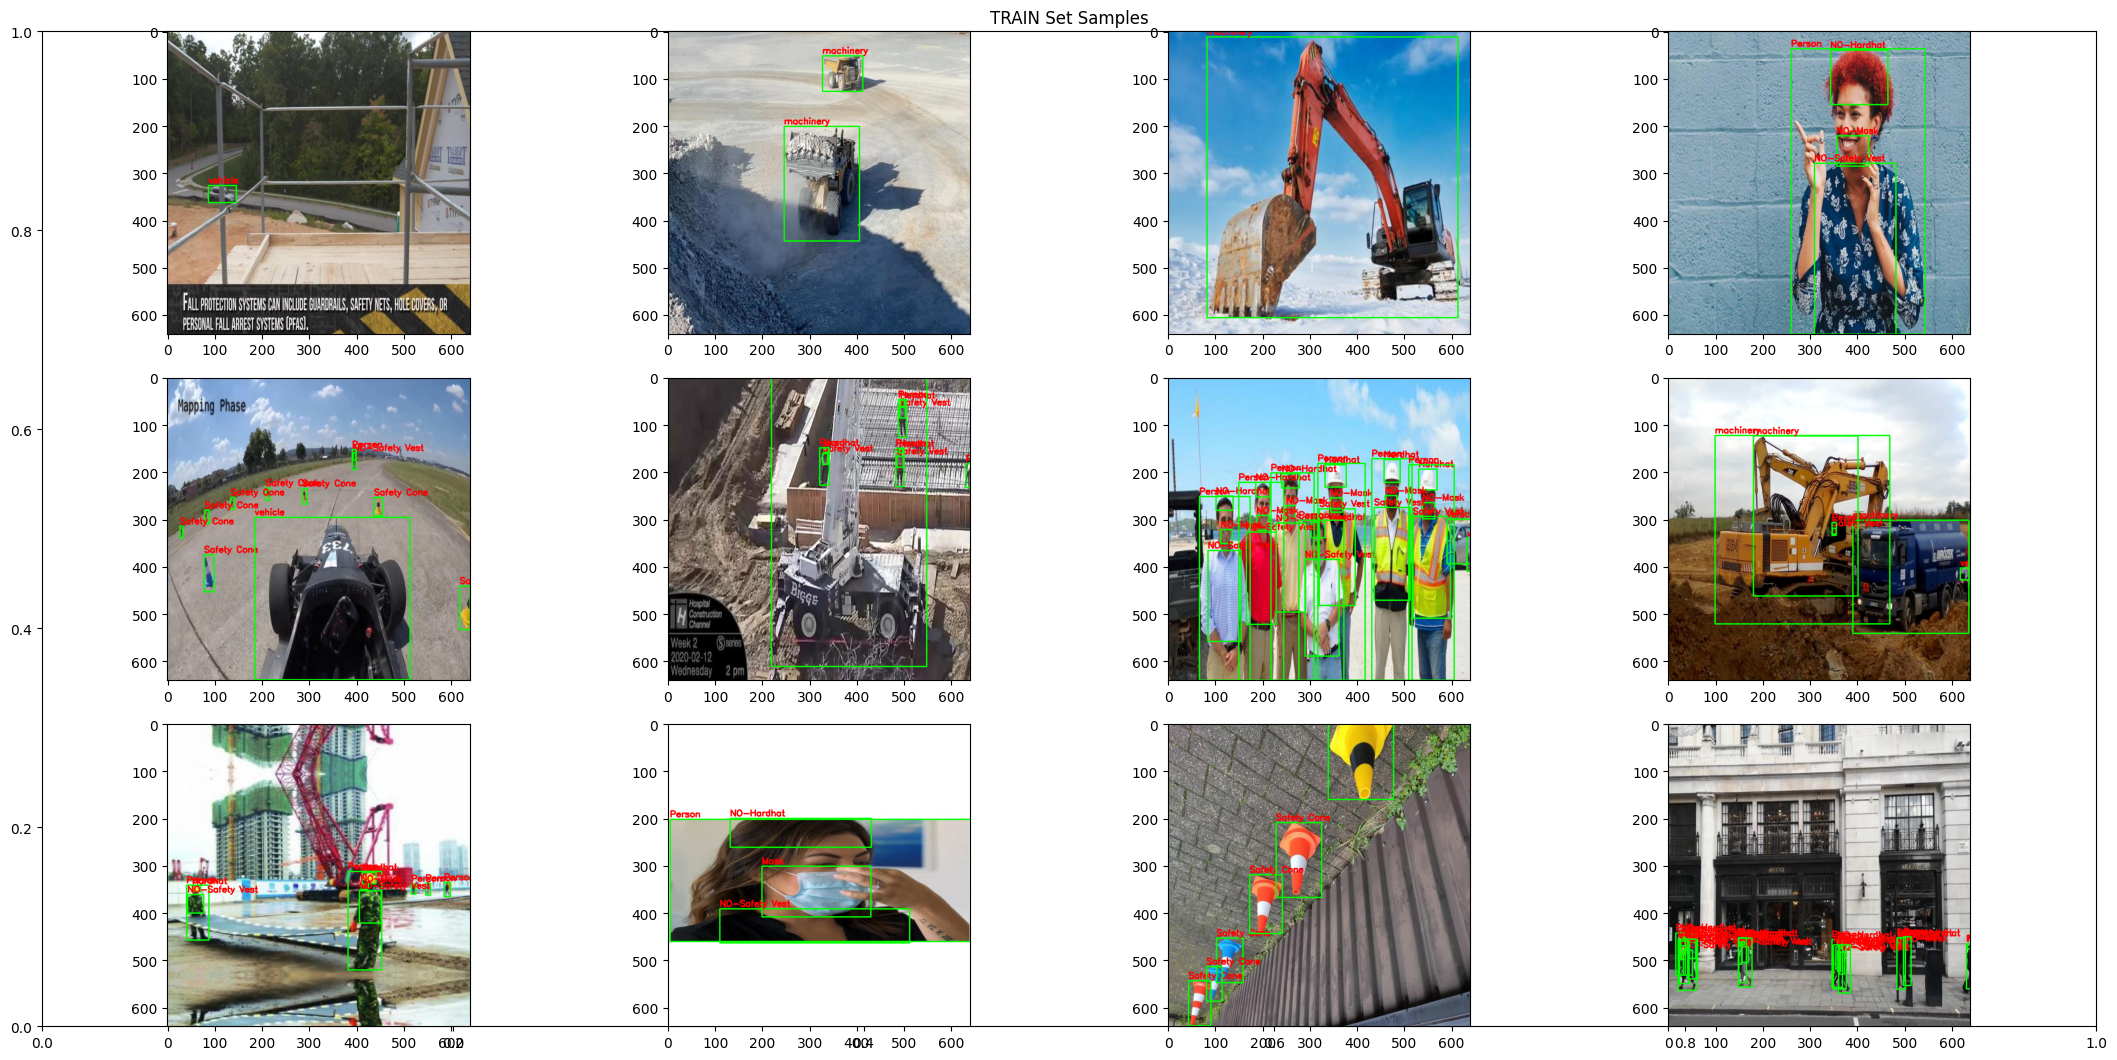

In [42]:
visualize_samples(mode = 'train', n_samples = 12)

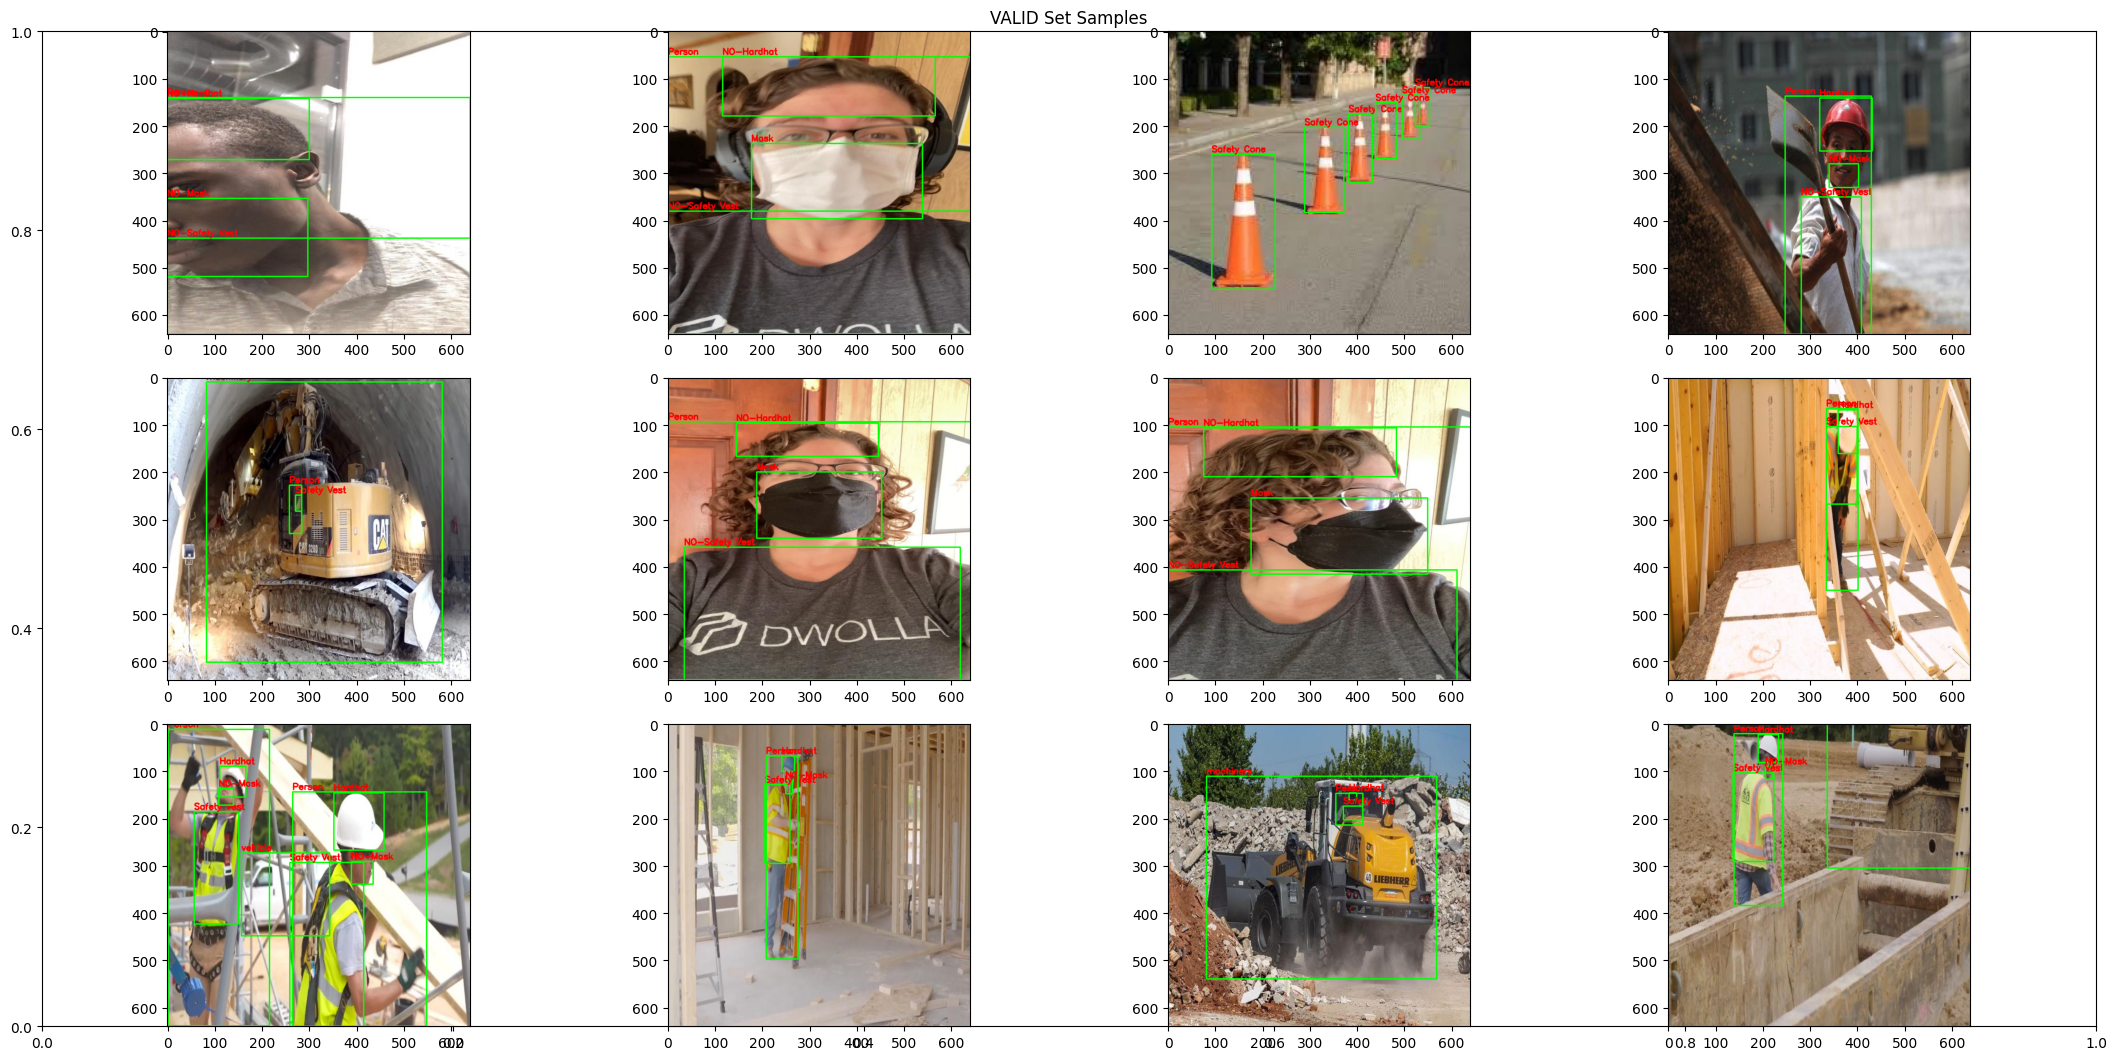

In [43]:
visualize_samples(mode = 'valid', n_samples = 12)

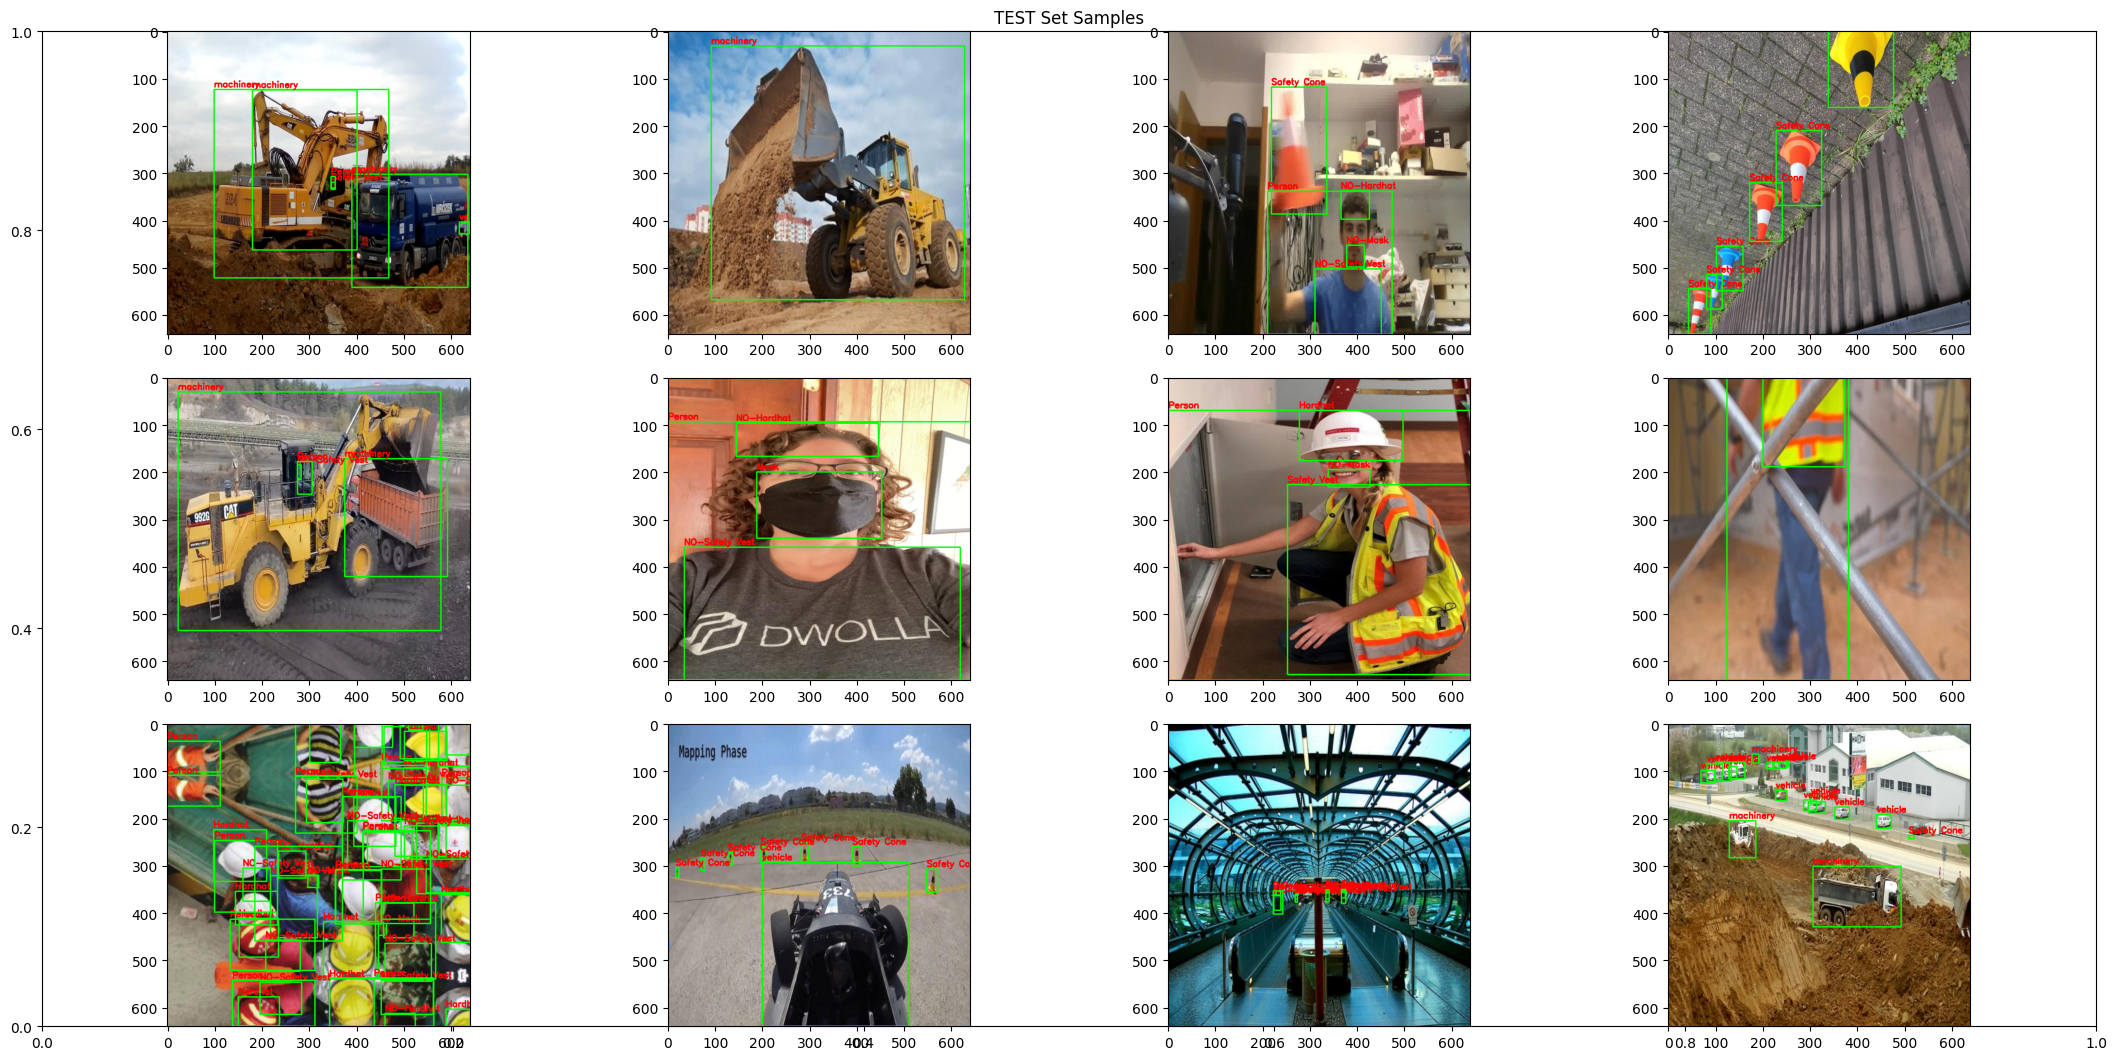

In [44]:
visualize_samples(mode = 'test', n_samples = 12)

### Обучение модели

In [46]:
import yaml
# Создаем yaml файл для обучения модели YOLOV8
ppe_data = dict(train = train_path,
                    val = valid_path,
                    test = test_path,
                   nc = len(class_names),
                   names = class_names)
with open('ppe_data.yaml', 'w') as output:
    yaml.dump(ppe_data, output, default_flow_style = True)

In [48]:
%cat ppe_data.yaml

{names: [Hardhat, Mask, NO-Hardhat, NO-Mask, NO-Safety Vest, Person, Safety Cone,
    Safety Vest, machinery, vehicle], nc: 10, test: ./css-data/test, train: ./css-data/train,
  val: ./css-data/valid}


In [51]:
!yolo task=detect mode=train epochs=100 data='ppe_data.yaml' model=yolov8n.pt imgsz=640 patience=10

/home/podonok/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=ppe_data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=